In [1]:
# Common imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Load the CSV into a DataFrame
synergy_l_data = pd.read_csv("synergy_logistics_database.csv")

In [3]:
# Check the data we are working with
synergy_l_data.head()

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


In [4]:
# Get some info from the DataFrame
synergy_l_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19056 entries, 0 to 19055
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   register_id     19056 non-null  int64 
 1   direction       19056 non-null  object
 2   origin          19056 non-null  object
 3   destination     19056 non-null  object
 4   year            19056 non-null  int64 
 5   date            19056 non-null  object
 6   product         19056 non-null  object
 7   transport_mode  19056 non-null  object
 8   company_name    19056 non-null  object
 9   total_value     19056 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.5+ MB


In [5]:
# Just to make sure all of the data is complete
pd.isnull(synergy_l_data).any()

register_id       False
direction         False
origin            False
destination       False
year              False
date              False
product           False
transport_mode    False
company_name      False
total_value       False
dtype: bool

In [6]:
# temp = synergy_l_data[['origin','destination']].drop_duplicates()
unique_routes = synergy_l_data.pivot_table(columns=['origin','destination'], aggfunc='size')
sorted_routes = unique_routes.sort_values(ascending=False)

In [7]:
total_deliveries = synergy_l_data.shape[0]
tmp = {'route': [], 'count': []}
total = 0
for index, ((origin, destination), count) in enumerate(sorted_routes.items()):
    if index < 15:
        tmp['route'].append(f'{origin} - {destination}')
        tmp['count'].append(count)
    total += count
tmp['route'].append('Average')
tmp['count'].append(total/len(sorted_routes))

In [8]:
tmp_df = pd.DataFrame(tmp,columns=['route','count'])
tmp_df

,route,count
0,South Korea - Vietnam,497.000000
1,Netherlands - Belgium,437.000000
2,USA - Netherlands,436.000000
3,Japan - Mexico,385.000000
4,China - Mexico,351.000000
5,China - Japan,343.000000
6,Germany - China,328.000000
7,Japan - Brazil,306.000000
8,Germany - France,299.000000
9,South Korea - Japan,294.000000


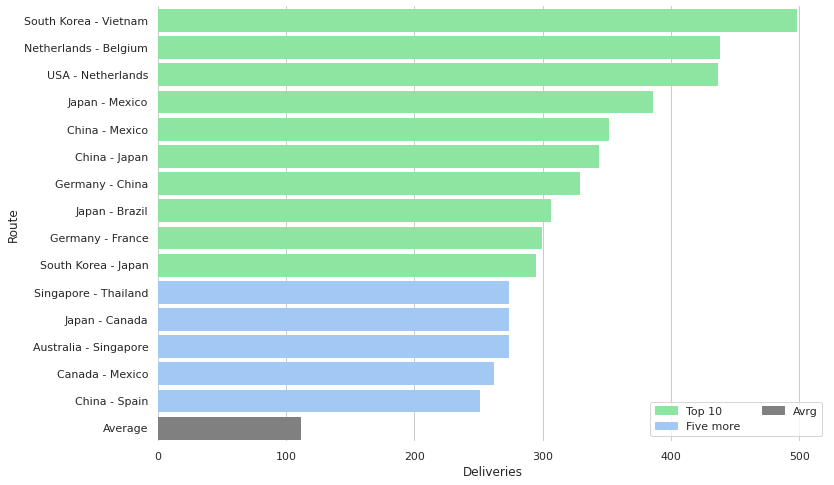

In [9]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 8))

# Plot the total crashes
sns.barplot(y="route", x="count", data=tmp_df)

sns.set_color_codes("pastel")
top = 10
for index, bar in enumerate(ax.patches):
    if index == 0:
        bar.set_label(f'Top {top}')
    if index == top:
        bar.set_label(f'Five more')

    if index < top:
        bar.set_color('g')
    elif index == len(ax.patches) - 1:
        bar.set_color('gray')
        bar.set_label(f'Avrg')
    else:
        bar.set_color('b')

ax.set(ylabel="Route", xlabel="Deliveries")
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)